# **Causal Relationships in Credit Risk**

**Applied Predictive Analytics | Summer 2022 | HU Berlin**

Leon Hagel | Kieu-Long Huynh | Mehmet Oguzcan Kervanci | Peiqi Zhu

In [1]:
import os
os.chdir("src")

In [3]:
import models
import utils

## **1. Introduction**

Philosophy was the discipline that first introduced causality. Many Greek philosophers, like Plato and Aristotle, were motivated by the desire to understand the underlying causes of natural occurrences. Plato’s quote “everything that becomes or changes must be so owing to some cause” inspired other philosophers to construct their theories of causality using this term as their foundation (Noguiera et al., 2022). Moreover, causal understanding has been the fundamental goal of many different fields, from biology to the development of medical products to policy making (Vowels et al., 2021). In recent times, the concept of causality has evolved from a purely philosophical concept to one used in artificial intelligence and machine learning. The main reason is that causality can be a crucial tool in mitigating the resulting problems of correlation-based machine learning (ML) models (Noguiera et al., 2022). Association-based ML models are deceived by illusory dynamics and unable to adjust to changing circumstances. Another reason is that the traditional way to find causal relations would be randomized experiments or interventions. However, there are several problems with this approach. In most real-life scenarios, performing these experiments may not be ethical, financially feasible, or practical. Vowels et al. (2021) assert that this paves the way for researchers to investigate causality over observational data. Nevertheless, observational data has some problematic aspects. Again, Vowels et al. (2021) mentioned the existence of problems in observational data such as selection bias, non-existence of all relevant variables and not-known causal relationships a priori. Considering those two key reasons, researchers in the disciplines of statistics and machine learning have formed various methods for identifying causal links to solve these issues, which necessitates mostly strong assumptions. In fact, the Causal Bayesian Networks (CBN) is one of the most well-known ML algorithms for uncovering causal correlations given data. The constraint-based and scored-based algorithms are used under the hood of CBN. More recently, functional causal (Shimizu et al., 2016) and gradient-based optimization (Zheng et al., 2018) models also have taken a place in causal discovery.

This study will analyze the benefits of incorporating causality in credit risk modeling in out-of-sample performance. The idea is that variables that have a causal effect on the target variable will predict the outcome better than purely correlating variables, regardless of ever-changing environments (e.g., financial and macroeconomic developments) that might influence data distribution. In the following parts, this study will present some concepts of causality, four causal discovery methods, and one causal prediction method in chapter 2. Our idea of incorporating causality in credit risk modeling will be laid out in chapter 3. The coding approach and our empirical results will be presented thereafter. The empirical results will be evaluated in chapter 5, followed by the summary of our findings in chapter 6.

## **2. Related Work**

Before introducing algorithms for causal discovery in-depth, it is noteworthy to mention the usual assumptions and concepts of causal discovery. 
- **Acyclicity:** In the causal graph, there does not exist a direct route from a node back to itself. (Eberthard, 2017)
- **Directed Acyclic Graph:** In order to describe a priori causal assumptions and facilitate variable selection techniques for causal problems, directed acyclic graphs (DAGs) are adopted (Piccininni et al., 2022). As illustrated below, nodes here stand in for variables. The causal linkages are represented by directed edges from cause to effect. For instance, in such a graph, a directed route from U to X denotes a causal relationship from U to X in the system, where cause U affects the value of its consequence X but not the other way around.
- **Causal Markov Assumption:** After all the direct causes of an event are established, the event is found as probabilistically independent of its causal non-descendants (Druzdzel, 2019). 
- **Causal Faithfulness Assumption:** All interdependencies found in the data are structural, arising from the causal graph's structure rather than being coincidental (Druzdzel, 2019). 
- **Causal Sufficiency Assumption:** All the tested sets of variables include the common causes of the paired variables on the set (Spirtes et al., 2017).
- **Markov blanket:** For a given causal graph, a node in a graph forms a Markov blanket with its child-, its parents-, and its spouses-nodes, which form the most relevant causal relationship of the node (Pellet et al., 2008).

<center>
<figure>
    <img src="img/simpleDAG.png" alt="Figure 2.1: Example DAG (Dawid, 2010).") style=height:250px>
    <figcaption align = "left"><b>Figure 2.1:</b> Example DAG (Dawid, 2010).</figcaption>
</figure>
</center>

After the fundamental concepts in causal discovery, algorithms in this study are explained in detail in the next section.

There are numerous categories of causal discovery approaches (Glymour et al., 2019), and we have chosen the main four: constraint-based, score-based, functional causal model-based, and gradient-based. For these categories, we have selected respective models based on the code availability and the representativeness, i.e., in each category, the presented models are prominent and even have more recent models based on them (Vowels et al., 2021). 

### **2.1 Constraint-Based: PC Algorithm**

Out of the existing constraint-based causal discovery models, we have chosen the PC (Peter-Clark) algorithm presented by Spirtes et al. (1991), one of the most representative algorithms under this catalog and the foundation of many variations of constraint-based causal discovery models. The algorithm learns the causal structure constrained by conditional independence in the data through appropriate tests (Glymour et al., 2019). The output of the models is a causal relation graph that is, at best, Markov equivalent to the true graph (Le et al., 2016). The validity of the PC algorithm resulting in a Markov equivalent graph depends on faithfulness, which serves as a sufficient condition (Glymour et al., 2019). 

The PC algorithm follows the same major steps (Spirtes et al., 2001) as other constraint-based causal discovery models. From a given dataset, 
1. Extract a complete undirected graph, from which a skeleton is extracted by testing the conditional independence of variables pairwise. 
1. Identify the immoralities to direct the edges in the skeleton. Given the paired variables A and B have no direct edges in the skeleton graph and A, B are dependent conditional on another variable C, then A, B, C form an immorality. The variable C makes the paired variables A, B dependent, so C is the immoral child of A and B. Therefore, the direction of the edges from the paired variables A, B point to the child node C. 	
1. Directs the edges between colliders (the child nodes) and their incidents in the rest of the skeleton. Since the conditional independence between each pair of variables in the graph was tested and all the immoralities are marked in the previous steps, the direction of the rest of the undirected edges can be easily determined.


### **2.2 Score-Based: GES**

Score-based algorithms seek to discover causal relations by assigning a properly defined score function to candidate graphs. It assesses the strength of potential causal models using several score functions rather than individually checking each conditional independence criterion with a binary decision and then outputs one or more graphs with the best score. As Malinsky et al. (2017) argues, the Bayesian Information Criterion (BIC) score, which roughly approximates the model’s posterior probability given the dataset, is the most prevalent score. 

One of the prominent approaches is Greedy Equivalence Search (GES) (Meek, 1997; Chickering, 2003), which directly searches the space of equivalence classes. Glymour et al. (2019) explain the two-phase process of GES. 

1. In the forward phase, it begins with a blank graph, adds any currently needed edges, and then removes any superfluous edges in a pattern. 
1. When it is judged that adding a directed edge will improve fit as measured by score, such as BIC, it is added at each stage of the algorithm.
1. The process is repeated after mapping the generated model to the appropriate Markov equivalence class. 
1. The second step, the backward phase, starts once the score can no longer be enhanced. The GES algorithm then determines whether there can be any edges eliminated to improve the score. It goes edge by edge until it can remove no more edges.

Given that its trajectory depends on the relative strengths of the linkages and conditional associations of the variables, the GES method is more difficult to illustrate than the PC algorithm. 


### **2.3 Function-Based: LiNGAM**

Functional-based causal discovery models learn the causal relation in the observed data based on a potential function between the input variables. The major difference between the functional-based causal discovery to other approaches is that it makes assumptions on the data distribution in addition to the conditional independencies (Shimizu et al., 2006). Moreover, it is able to determine the direction of the causal relation DAG graph as the independencies are only held in one direction. 

The LiNGAM (Linear Non-Gaussian Acyclic Model) is the first computational efficient functional-based model (Shimizu et al., 2006). LiNGAM estimates the causality between variables in the observable data relatively efficiently based on a linear function, as the model assumes the underlying distribution of the data to be non-Gaussian (Shimizu et al., 2006). The first step of the estimation is the Independent Component Analysis to decompose the linear relationship between the dependent variables and the noise term after fitting the data to the linear function. By iteratively fitting the data, using different independent and dependent variables to fit the function, the direction of the variable that gives independent noise terms represents the causal relationship. 

### **2.4 Gradient-Based: NOTEARS**

In general, a gradient-based approach attempts to optimize the graph parameters continuously as opposed to score-based approaches which try to optimize the graph parameters by a purely combinatorial approach.As one of the first and most influential implementations of a gradient based approach, NOTEARS (Non-combinatorial Optimization via Trace Exponential and Augmented lagRangian for Structure learning, Zheng et al., 2018) will be used. The NOTEARS approach converts a combinatorial problem into a continuous problem in a Bayesian network to address the challenge of asymmetric matrix and the acyclicity constraint.

<center>
<figure>
    <img src="img/adjacency.png" alt="Figure 2.2: DAG and Adjacency Matrices.") style=height:100px>
    <br>
    $W = \begin{bmatrix}0 & 1 & 0 \\ 0 & 0 & 1 \\ 1 & 0 & 0 \\\end{bmatrix} \longrightarrow W^3 = \begin{bmatrix}1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \\\end{bmatrix}$
    <br>
    <br>
    <figcaption align = "left"><b>Figure 2.2:</b> DAG and Adjacency Matrices.</figcaption>
</figure>
</center>


The objective of the NOTEARS algorithm is to minimize the recreation loss for the input features X while using a function $F(W)$ and fulfilling a continuous acyclicity constraint $h(W)$. Furthermore, NOTEARS uses two properties of adjacency matrices to determine acyclicity in the graphs. An element $w_{ij}$ in the adjacency matrix represents a directed edge from $i$ to $j$. Taking the adjacency matrix to the power of $n$, the element $w_{ij}$ in the matrix $W^n$ represents the walk from $i$ to $j$ using $n$ edges. Cyclicity using $n$ edges in an adjacency matrix $W^n$ can be found if there are non-zero elements on the matrix diagonal ($w_{ii} \neq 0$). 

The weights W used by the function $F(W)$ can be interpreted as an adjacency matrix with the dimensions $d * d$, where $d$ is the number of variables. In the weight matrices, elements $w_{ij} \neq 0$ indicate a causal effect of $x_i$ on $x_j$. Weights $w_{ii} \neq 0$ in the weight matrix $W^n$ for any $n$ indicate that $x_i$ has a causal effect on itself and hence violates the acylicity constraint. Visually, it causes a cycle in a DAG. 


NOTEARS accounts for acyclicity with the h-value $h(W)=tr(e^{W \odot W})-d=0$, where $e^X = \sum_{k=0}^{∞}\frac{1}{k!}X^k = I+X+\frac{X^2}{2!}+\frac{X^3}{3!}+ ... $ is the exponential matrix of matrix $X$ and $d$ is the number of variables. The hadarmard product of $W$ is taken to guarantee that the elements of the weight matrix are non-negative. 

In the case that the DAG is acyclic, $tr(e^{W \odot W})$ will be $d$ because for the exponential matrix, all elements of the main diagonal of the matrices besides the identity matrix will be zero, hence resulting in a h-value of zero. Opposed to that, a higher h-value indicates more cycles in the DAG and a stronger violation of the acyclicity assumption. 

### **2.5 Causal Regularization: CASTLE**

In contrast to previous approaches, CASTLE (CAusal STructure LEarning, Kyono et al., 2020) is a predictive model incorporating causality, as a regularization component. It simultaneously learns the causal structure while predicting the target. It uses the NOTEARS acylicity constraint (h-value) as a regularization penalty during model training. CASTLE assumes that there is a causal DAG among the feature and target variables. However, CASTLE uses causal discovery only for regularization purposes and hence does not focus on returning a proper DAG. By choosing a threshold value, an approximated DAG can be returned for visualization purposes. 

The training objective function which is given as:

<center>
$\Theta \in \min_{\Theta}\frac{1}{N}||Y-[f_{\Theta}(\tilde{X})]_{:,2}|| ^2 + \lambda R_{DAG}(\tilde{X}, f_{\Theta})$
</center>

<br>
<center>
$R_{DAG}(\tilde{X}, f_{\Theta}) = L_{N}(f_{\Theta}) + R_{\Theta_{1}} + \beta V_{\Theta_{1}}$
</center>
<br>

Similar to other predictive models, it minimizes the prediction loss (left term) but in addition tries to minimize the so-called causal discovery loss (right term) as well. The causal discovery loss is the sum of recreation loss, acyclical constraint and lasso penalty.

<center>
<figure>
    <img src="img/castle.png" alt="Figure 2.3: CASTLE Network Architechture (Kyono et al., 2020).") style=height:300px>
    <figcaption align = "left"><b>Figure 2.3:</b> CASTLE Network Architechture (Kyono et al., 2020).</figcaption>
</figure>
</center>

The network structure illustrates how CASTLE learns the causal structure in the causal discovery task and performs the prediction task at the same time using a set of neural networks. Most noteworthy is, that all sub-networks, share the same hidden layers when determining both $f_1$ (prediction task) and $f_k$ (causal discovery task). 

## **3. Methodology**

After reviewing available methods within causal discovery and causal prediction, we propose two approaches in order to assess the benefits of incorporating causality in predictive modeling and use a non-causal benchmark model applying standard feature selection and regularization methods.

The two causal approaches are as follows:

1. **Causal Selection:** Incorporate causality by selecting features based on the Markov blanket determined by different causal discovery methods as laid out in chapter 2 (Pearl, 1989). The selected variables will be used as the input features for our hyperparameter-tuned prediction models.
1. **Causal Regularization:** Incorporate causality by using the causal regulation approach CASTLE as presented in chapter 2.


The approaches will be assessed in the following three dimensions:
1. **Predictive Performance:** To assess whether learning causal structures during a prediction task improves the predictive performance, we will compare the AUC score of our causal models to our benchmark models. We chose a black-box Gradient Boosting model for the causal selection models, as this model should achieve higher scores than the white-box models Logistic Regression and Decision Trees. 
1. **Interpretability:** Besides the predictive performance of our causal models, we are interested in how these models improve the interpretability of the prediction task. To achieve this, we will analyze the learned DAGs and check if causal structure learning during a prediction task improves the predictive performance of interpretable white box models, i.e., Logistic Regression and Decision Trees. During our analysis of the learned DAGs, we will do sanity checks if the models provide sensible DAGs and validate how these DAGs could be used in a credit risk setting (e.g., to improve risk assessment). As a true DAG does not exist, this is subject to the authors’ discretion.
1. **Resources:** An important aspect in creating machine learning models is the scalability of these models and hence the required resources. To analyze the scalability, we will compare training times and required data. 


Our pipeline to predict the probability of credit default in the credit risk setting contains the following steps:
1. **Exploratory Data Analysis:** Descriptive analysis of the provided credit data. 
1. **Data Cleaning:** Basic data cleaning operations include removing irrelevant data, fixing structural errors, and treating missing values.
1. **Feature Creation:** Simple feature creation operations, mainly to address categorical variables. We refrain from exhaustive feature creation to not introduce bias in the causal relationships in the data. 
1. **Grid Search:** Hyperparameter tuning for causal and benchmark models using grid search.
1. **Model training:** Training our models based on the optimal hyperparameters from the grid search.
1. **Model evaluation:** Assessing the predictive performance, interpretability and required resources of our models.

For our benchmark models and the predictive models of our causal selection, we used scikit-learn’s GradientBoostingClassifier, DecisionTreeClassifier and LogisticRegression (Scikit-learn, 2011). Furthermore, we chose to use statistically significant features provided by statsmodels’ OLS model (Seabold et al., 2019) and features selected by scikit-learn’s feature selection models RFE and SFS (Scikit-learn, 2011) as feature selection benchmarks. We choose RFE and SFS as our feature selection benchmark because they are the most common and primarily used approaches for feature selection. Regarding the causal discovery, no library is currently available which could provide all required models for our analysis. Therefore, we chose to use the PC and GES models provided by the causal discovery toolbox (Kalainathan et al., 2019) as well as the ICALiNGAM and NOTEARS model provided by the gcastle library (Zhang et al., 2021) for our causal discovery task. To build the CASTLE regularization model, we used a slightly modified version of the code provided by Kyono et al. (2020)

As we are using different libraries to train our models, the different models require different steps to train the models and predict our target. To unify the model training process, we added a pipeline object to the used models, which contains all methods and steps required for model training and our analysis. The template for our pipeline object can be found at `src/utils/Pipeline.py` and the modified model classes can be found at `src/models/`.

Most important pipeline methods:

```
model.pipeline.fit(X_train, y_train) # performs all operations to fit the model
model.pipeline.predict(X): # performs all operations to predict credit default
```

To efficiently perform a grid search to tune the hyperparameter of our models, we created a Grid Search class. The Grid Search class uses our pipeline model framework and performs a stratified k-fold cross validation for the provided parameter combinations. Examples of our coding pipeline can be found in section 4. Empirical Results.

### **4. Empirical Results**

There are 149,985 observations, 31 features and one target variable in the raw training data. In the raw test data, there are observations (50,015) equal to 33% of the number of observations in the training data. The features contain various information about a specific loan, such as borrowers' credit scores, the used channel to get a mortgage, property's location, type etc. In this study, three variables “dt_first_pi”,”dt_matr” and “pre_relief” are dropped, which decreased the number of features from 31 to 28. The main reasons are that those features needed further feature creation effort and might introduce bias in the causal structure.

Moreover, missing values in the data are checked before digging in further. The cases from training data that contain missing values are dropped, resulting in 123,823 remaining observations. Furthermore, we used mean imputation for the missing values in the test data to avoid losing any test cases. 

Target is the dummy variable that indicates whether the loan defaulted and a value of 1 indicates that the loan defaulted. As seen in the plot below, credit defaults are rare in real-life scenarios (Bischl et al., 2016), leaving us with the problem of class imbalance. This study will use undersampling for specific models that are sensitive to class imbalance.  

<center>
<figure>
    <img src="out/img/classimbalance.png" alt="Figure 4.1: Class Imbalance of the Target Feature.") style=height:100%>
    <figcaption align = "left"><b>Figure 4.1:</b> Class Imbalance of the Target Feature.</figcaption>
</figure>
</center>

Related to credit-risk setting variables in the training dataset, the average interest rate for those who default is found as *4.3*, while for those who did not default is *4.0*. It is aligned with the common knowledge, such that creditors issue loans with higher interest rates to the riskier groups. We examined the “fico” variable in the training dataset, which indicates the credit score. Below is the histogram of credit scores for defaulters and non-defaulters. While the credit score histogram of defaulting borrowers is closer to the normal distribution, there is a lighter-skewed distribution in non-default borrowers. While the credit score average of defaulting borrowers is *709.3*, this ratio is *754.1* for non-default borrowers.

<center>
<figure>
    <table><tr>
        <td> <img src="out/img/credscorehist_withoutdefault.png" alt="Credit Score without default" style="width: 100%;"/> </td>
        <td> <img src="out/img/credscorehist_withdefault.png" alt="Credit Score with default" style="width: 100%;"/> </td>
    </tr></table>
    <figcaption align = "left"><b>Figure 4.2:</b> Histograms of the Credit Score.</figcaption>
</figure>
</center>

The training and test dataset are different in terms of distributions of numerical variables. Figure 4.3 shows a shared example of two of the crucial variables, namely “dti” and “fico”, which do present a significant difference. Furthermore, we perform a two-sample Kolmogorov-Smirnov test for numerical variables in those two datasets and the null hypothesis in this test is “the two distributions are identical”. For most of the column pairs,  p-value is close to zero, which helps us to conclude that the two groups had different distributions. 

<center>
<figure>
    <table>
    <tr><td style="background:white;"><img src="out/img/dtidist.png" alt="dti") style=height:75%></td></tr>
    <tr><td style="background:white;"><img src="out/img/creditscoredist.png" alt="creditscore") style=height:75%></td></tr>
    </table>
    <figcaption align = "left"><b>Figure 4.3:</b> Histograms of the Features Debt to Income and Credit Score.</figcaption>
</figure>
</center>

After performing the EDA and preparing the data, we performed a grid search for all of our candidate models. Our GridSearch class uses our pipeline model framework and performs a stratified k-fold cross validation for the provided parameter combinations. The results are stored at `out/grid-search/` and a visualization of all results can be found in the appendix (`appendix/grid-seach.ipynb`)

In [4]:
# Example: Grid-Search, used grid-search code located at src/grid-search

# loading the data
train = utils.csv.read("../data/features_train_pre-tts_no-dummies.csv", low_memory=False).dropna()
train = train.drop(["id_loan"], axis=1)
y = train["TARGET"]
X = train.drop("TARGET", axis=1)

# candidate parameter
train_test_split = {
        "to_woe": [['zipcode', 'cd_msa', 'st', 'seller_name', 'servicer_name', 'prop_val_meth', 'prop_type', 
                    'flag_fthb', 'pgrm_ind', 'occpy_sts', 'loan_purpose', 'channel', 'prod_type']],
        "scaler": ["StandardScaler"]
}
init = {
        "max_depth": [None, 3, 6, 10],
    }

# cross-validation for candidate parameter
gs = utils.GridSearch(models.sklearn.DecisionTreeClassifier)
gs.fit(X, y, 5, train_test_split=train_test_split, init=init, verbose=1, dump=False)

[grid search] 4 parameter combinations identified.
[grid search] starting stratified kfold for parameter combination 1...
[grid search] starting stratified kfold for parameter combination 2...
[grid search] starting stratified kfold for parameter combination 3...
[grid search] starting stratified kfold for parameter combination 4...


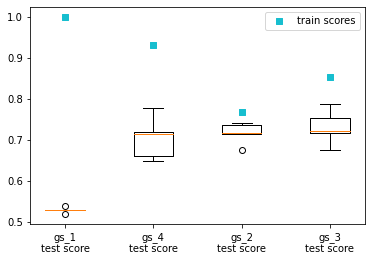

In [5]:
# Example: Evaluation of grid search results, evaluation of performed grid search in appendix/model-evaluation.ipynb
gs.plot()
gs.set_best("gs_3")

[causal-selection] train score:    0.8743
stored plot to ../cache/dag.png.


<Figure size 432x288 with 0 Axes>

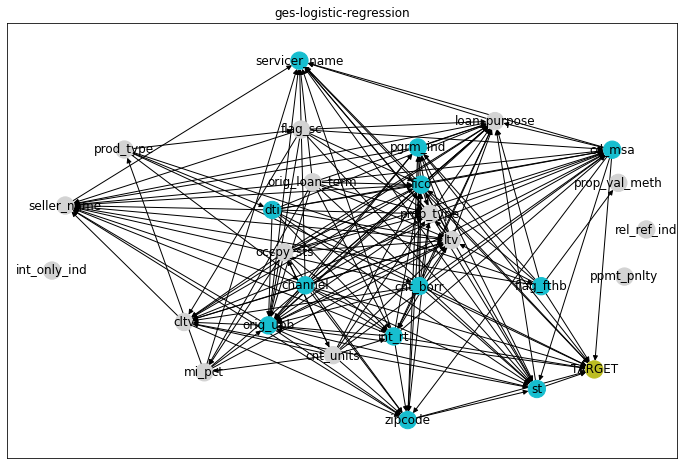

In [6]:
# Example: Model training, used model training code located at src/model-training/

train = utils.csv.read("../data/features_train_no-dummies.csv").dropna()
test = utils.csv.read("../data/features_test_no-dummies.csv")
X_train = train.drop(["TARGET", "id_loan"], axis=1)
X_test = test.drop(["id_loan"], axis=1)
y_train = train["TARGET"]

# model training
params = params = utils.json.load(f"../out/grid-search/causal-selection_ges-logistic-regression.json")["params"]["best"]
model = models.CausalSelection(**params.get("init", {}))
model.pipeline.fit(X_train, y_train, **params.get("fit", {}))
train_score = model.pipeline.evaluate(y_train, model.pipeline.predict(X_train), **params.get("predict", {}))
print(f"[causal-selection] train score:    {train_score:.4f}")
model.pipeline.generate_plots(filepath=f"../cache/dag.png", figsize=(12, 8), title="ges-logistic-regression", show=True);

We selected the optimal hyperparameter based on the grid search results to train our models. After model training, we predict the credit default for the test data and extract training statistics, DAGs, Markov blankets and selected features. The model training results are stored in the `out/` directory and are visualized in the appendix (`appendix/model-evaluation.ipynb`).

<center>
<figure>
    <table>
    <tr>
        <td style="background:white;"><img src="out/img/dag_causal-selection_pc-boosting.png" alt="pc-boosting") style=height:25%></td>
        <td style="background:white;"><img src="out/img/dag_causal-selection_pc-decision-tree.png" alt="pc-decision-tree") style=height:25%></td>
        <td style="background:white;"><img src="out/img/dag_causal-selection_pc-logistic-regression.png" alt="pc-logistic-regression") style=height:25%></td>
    </tr>
    <tr>
        <td style="background:white;"><img src="out/img/dag_causal-selection_ges-boosting.png" alt="ges-boosting") style=height:25%></td>
        <td style="background:white;"><img src="out/img/dag_causal-selection_ges-decision-tree.png" alt="ges-decision-tree") style=height:25%></td>
        <td style="background:white;"><img src="out/img/dag_causal-selection_ges-logistic-regression.png" alt="ges-logistic-regression") style=height:25%></td>
    </tr>
    <tr>
        <td style="background:white;"><img src="out/img/dag_causal-selection_lingam-boosting.png" alt="lingam-boosting") style=height:25%></td>
        <td style="background:white;"><img src="out/img/dag_causal-selection_lingam-decision-tree.png" alt="lingam-decision-tree") style=height:25%></td>
        <td style="background:white;"><img src="out/img/dag_causal-selection_lingam-logistic-regression.png" alt="lingam-logistic-regression") style=height:25%></td>
    </tr>
    <tr>
        <td style="background:white;"><img src="out/img/dag_causal-selection_notears-boosting.png" alt="notears-boosting") style=height:25%></td>
        <td style="background:white;"><img src="out/img/dag_causal-selection_notears-decision-tree.png" alt="notears-decision-tree") style=height:25%></td>
        <td style="background:white;"><img src="out/img/dag_causal-selection_notears-logistic-regression.png" alt="notears-logistic-regression") style=height:25%></td>
    </tr>
    <tr>
        <td style="background:white;"><img src="out/img/dag_castle.png" alt="castle") style=height:25%></td>
        <td style="background:white;"></td>
        <td style="background:white;"></td>
    </tr>
    </table>
    <figcaption align = "left"><b>Figure 4.4:</b> DAGs generated during Model Training.</figcaption>
</figure>
</center>

<center>
<figure>
    <img src="out/img/markov-blankets.png" alt="Figure 4.5: Markov Blankets and Selected Features after Causal Discovery.") style=height:100%>
    <figcaption align = "left"><b>Figure 4.5:</b> Markov Blankets and Selected Features after Causal Discovery.</figcaption>
</figure>
</center>

We performed the grid search and model training for all models and aggregated the results to be able to compare our models in our three dimensions, i.e., predictive performance, interpretability and required resources.

In [7]:
# training statistics
print("Table 4.1: Statistics recorded during Model Training.")
utils.csv.read("../out/training-stats/stats.csv").round(3).fillna("-")

Table 4.1: Statistics recorded during Model Training.


,train_score,h_value,time,time_selection,time_causal,time_predictive,time_sec,time_selection_sec,time_causal_sec,time_predictive_sec,X_train_shapes,y_train_shapes,X_train_shapes_selection,y_train_shapes_selection,X_train_shapes_causal,y_train_shapes_causal,X_train_shapes_predictive,y_train_shapes_predictive,n_features
0,0.906,-,00:12,-,-,-,12.306,-,-,-,"[123823, 27]",[123823],-,-,-,-,-,-,27.0
1,0.736,-,00:00,-,-,-,0.035,-,-,-,"[123823, 27]",[123823],-,-,-,-,-,-,27.0
2,0.878,-,00:02,-,-,-,2.360,-,-,-,"[123823, 27]",[123823],-,-,-,-,-,-,27.0
3,0.906,-,00:12,-,-,00:12,12.230,-,-,12.054,-,-,"[123823, 27]",[123823],-,-,"[123823, 27]",[123823],27.0
4,0.875,-,00:00,-,-,00:00,0.435,-,-,0.256,-,-,"[123823, 27]",[123823],-,-,"[123823, 27]",[123823],27.0
5,0.879,-,00:01,-,-,00:01,1.519,-,-,1.347,-,-,"[123823, 27]",[123823],-,-,"[123823, 27]",[123823],27.0
6,0.711,-,00:01,-,-,00:01,1.850,-,-,1.749,-,-,"[123823, 27]",[123823],-,-,"[123823, 11]",[123823],11.0
7,0.654,-,00:00,-,-,00:00,0.142,-,-,0.034,-,-,"[123823, 27]",[123823],-,-,"[123823, 11]",[123823],11.0
8,0.639,-,00:00,-,-,00:00,0.607,-,-,0.462,-,-,"[123823, 27]",[123823],-,-,"[123823, 11]",[123823],11.0
9,0.773,-,08:13,-,-,00:02,493.925,-,-,2.894,-,-,"[123823, 27]",[123823],-,-,"[123823, 1]",[123823],1.0


The performance on the Kaggle test dataset can be observed in the Table 4.2.

<center>
<figure>
    
<table>
    <thead>
        <tr>
            <td><b>Model Name</b></td>
            <td><b>Testing AUC</b></td>
            <td><b>KAGGLE</b></td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>castle</td>
            <td>0.8336</td>
            <td>0.7203</td>
        </tr>
        <tr>
            <td>boosting</td>
            <td>0.8407</td>
            <td>0.7160</td>
        </tr>
        <tr>
            <td>causal-selection_pc-boosting</td>
            <td>0.8411</td>
            <td>0.7160</td>
        </tr>
        <tr>
            <td>feature-selection_correlation-boosting</td>
            <td>0.8409</td>
            <td>0.7159</td>
        </tr>
        <tr>
            <td>causal-selection_lingam-logistic-regression</td>
            <td>0.8410</td>
            <td>0.7157</td>
        </tr>
        <tr>
            <td>logistic-regression</td>
            <td>0.7618</td>
            <td>0.7152</td>
        </tr>
        <tr>
            <td>causal-selection_pc-logistic-regression</td>
            <td>0.8409</td>
            <td>0.7143</td>
        </tr>
        <tr>
            <td>feature-selection_correlation-logistic-regression</td>
            <td>0.8377</td>
            <td>0.7134</td>
        </tr>
        <tr>
            <td>causal-selection_lingam-boosting</td>
            <td>0.8409</td>
            <td>0.7129</td>
        </tr>
        <tr>
            <td>causal-selection_ges-logistic-regression</td>
            <td>0.8383</td>
            <td>0.7128</td>
        </tr>
        <tr>
            <td>feature-selection_sfs-logistic-regression</td>
            <td>0.8126</td>
            <td>0.7118</td>
        </tr>
        <tr>
            <td>feature-selection_rfe-logistic-regression</td>
            <td>0.8351</td>
            <td>0.7106</td>
        </tr>
        <tr>
            <td>causal-selection_ges-boosting</td>
            <td>0.8356</td>
            <td>0.7060</td>
        </tr>
        <tr>
            <td>feature-selection_sfs-boosting</td>
            <td>0.7576</td>
            <td>0.6852</td>
        </tr>
        <tr>
            <td>feature-selection_sfs-decision-tree</td>
            <td>0.6564</td>
            <td>0.6816</td>
        </tr>
        <tr>
            <td>causal-selection_notears-decision-tree</td>
            <td>0.7502</td>
            <td>0.6730</td>
        </tr>
        <tr>
            <td>causal-selection_notears-logistic-regression</td>
            <td>0.8095</td>
            <td>0.6684</td>
        </tr>
        <tr>
            <td>causal-selection_notears-boosting</td>
            <td>0.8060</td>
            <td>0.6661</td>
        </tr>
        <tr>
            <td>causal-selection_pc-decision-tree</td>
            <td>0.7408</td>
            <td>0.6558</td>
        </tr>
        <tr>
            <td>decision-tree</td>
            <td>0.7770</td>
            <td>0.6557</td>
        </tr>
        <tr>
            <td>feature-selection_correlation-decision-tree</td>
            <td>0.7770</td>
            <td>0.6557</td>
        </tr>
        <tr>
            <td>causal-selection_lingam-decision-tree</td>
            <td>0.7354</td>
            <td>0.6070</td>
        </tr>
        <tr>
            <td>feature-selection_ols-boosting</td>
            <td>0.6701</td>
            <td>0.5772</td>
        </tr>
        <tr>
            <td>causal-selection_ges-decision-tree</td>
            <td>0.6934</td>
            <td>0.5757</td>
        </tr>
        <tr>
            <td>feature-selection_ols-logistic-regression</td>
            <td>0.6508</td>
            <td>0.5665</td>
        </tr>
        <tr>
            <td>feature-selection_ols-decision-tree</td>
            <td>0.6415</td>
            <td>0.5623</td>
        </tr>
        <tr>
            <td>feature-selection_rfe-decision-tree</td>
            <td>0.5327</td>
            <td>0.5298</td>
        </tr>
        <tr>
            <td>feature-selection_rfe-boosting</td>
            <td>0.7522</td>
            <td>0.5212</td>
        </tr>
    </tbody>
</table>

<figcaption align = "left"><b>Table 4.2:</b> AUC Scores based on Kaggle Test Data.</figcaption>
</figure>
</center>

## **5. Discussion**

### **5.1 Predictive Performance**

After selecting the optimal hyperparameter combinations for all our models, we applied a five-fold cross-validation to compare the predictive performance of our models. For our feature selection models, we combined the causal feature selection and usual feature selection model with a black box method, i.e., gradient boosting, and with white-box methods, i.e., logistic regression and decision tree, to investigate if including causality in prediction will improve the performance. Here the performance is judged based on the AUC score. Further material used to evaluate the performance of the models can be found in the appendix (`appendix/model-evaluation.ipynb`).

<center>
<figure>
    <img src="out/img/performance-boosting.png" alt="Figure 5.1: Test AUC scores from Five-Fold Cross Validation, Gradient Boosting Models.") style=height:100%>
    <figcaption align = "left"><b>Figure 5.1:</b> Test AUC scores from Five-Fold Cross Validation, Gradient Boosting Models.</figcaption>
</figure>
</center>

Figure 5.1 illustrates the predictive performance of boosting based on each causal discovery model. Among all the causal discovery models, only the PC-based causal selection model achieved a slight improvement in predictive performance compared to our benchmark gradient boosting model. One of the possible reasons is that the PC algorithm has selected the most features from the data compared to other feature selection models. In contrast, the worst performing model, NOTEARS has selected the least amount of features from the data (c.f. Table 4.1, *n_features*). However, all our causal selection models dropped features without a causal relationship to our target. So, regarding our performance focused black-box models, causal feature selection approach could improve the absolute prediction performance only on an insignificant level in our case. However, our causal selection was able to outperform the standard feature selection models using the gradient boosting model as a predictive model.

<center>
<figure>
    <img src="out/img/performance-logistic-regression.png" alt="Figure 5.2: Test AUC scores from Five-Fold Cross Validation, Logistic Regression Models.") style=height:100%>
    <figcaption align = "left"><b>Figure 5.2:</b> Test AUC scores from Five-Fold Cross Validation, Logistic Regression Models.</figcaption>
</figure>
</center>

Considering the interpretable white-box model Logistic Regression, all causal discovery models could improve the prediction performance compared to our benchmark. In this case, the PC algorithm still outperformed the other causal discovery models, while the level of improvement brought by NOTEARS is the least significant. Hence, causal selection is a viable option to improve the performance of the interpretable logistic regression. 

<center>
<figure>
    <img src="out/img/performance-decision-tree.png" alt="Figure 5.3: Test AUC scores from Five-Fold Cross Validation, Decision Tree Models.") style=height:100%>
    <figcaption align = "left"><b>Figure 5.3:</b> Test AUC scores from Five-Fold Cross Validation, Decision Tree Models.</figcaption>
</figure>
</center>

As for the second white-box model, the Decision Tree, causal selection did not result in a satisfying outcome. Our grid search approach of first tuning the hyperparameter of the predictive model followed by tuning the parameter of the causal model separately might be a possible reason why we did not see an improvement in predictive performance for the causal Decision Tree models. A possible way to improve the performance might be to simultaneously tune the parameters in the causal discovery and predictive models. However, this approach is resource and time-consuming. Therefore, it was not performed during our work. 

<center>
<figure>

<table>
    <thead>
        <tr>
            <td><b>Gradient Boosting</b></td>
            <td><b>Testing AUC</b></td>
            <td><b>Kaggle AUC</b></td>
            <td><b>Delta in PPS</b></td>
            <td><b>Relative delta (in %)</b></td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>boosting</td>
            <td>0.8407</td>
            <td>0.7160</td>
            <td>-</td>
            <td>-</td>
        </tr>
        <tr>
            <td>causal-selection_pc-boosting</td>
            <td>0.8411</td>
            <td>0.7160</td>
            <td>0.00</td>
            <td>0.00%</td>
        </tr>
        <tr>
            <td>feature-selection_correlation-boosting</td>
            <td>0.8409</td>
            <td>0.7159</td>
            <td>0.00</td>
            <td>0.02%</td>
        </tr>
        <tr>
            <td>causal-selection_lingam-boosting</td>
            <td>0.8409</td>
            <td>0.7129</td>
            <td>0.00</td>
            <td>0.45%</td>
        </tr>
        <tr>
            <td>causal-selection_ges-boosting</td>
            <td>0.8356</td>
            <td>0.7060</td>
            <td>0.01</td>
            <td>1.42%</td>
        </tr>
        <tr>
            <td>feature-selection_sfs-boosting</td>
            <td>0.7576</td>
            <td>0.6852</td>
            <td>0.03</td>
            <td>4.51%</td>
        </tr>
        <tr>
            <td>causal-selection_notears-boosting</td>
            <td>0.8060</td>
            <td>0.6661</td>
            <td>0.05</td>
            <td>7.50%</td>
        </tr>
        <tr>
            <td>feature-selection_ols-boosting</td>
            <td>0.6701</td>
            <td>0.5772</td>
            <td>0.14</td>
            <td>24.06%</td>
        </tr>
        <tr>
            <td>feature-selection_rfe-boosting</td>
            <td>0.7522</td>
            <td>0.5212</td>
            <td>0.19</td>
            <td>37.39%</td>
        </tr>
    </tbody>
</table>

<figcaption align = "left"><b>Table 5.1:</b> AUC Scores based on Kaggle Test Data, Gradient Boosting Models.</figcaption>
</figure>
</center>

Recall that a distributional change can be observed in chapter 4. When comparing the predictive performance with testing data on Kaggle, we expect our causal approaches to perform better as the idea of introducing causality is improving the out-of-sample performance of credit risk modeling. CASTLE is the overall best-performing model, supporting the idea of incorporating causality in making predictions. This could be explained by the fact that CASTLE was developed and optimized in order to incorporate causality in the prediction task itself, unlike in our approach, where we separately learn the DAG and then apply the output in a predictive model.

<center>
<figure>

<table>
    <thead>
        <tr>
            <td><b>Logistic Regression</b></td>
            <td><b>Testing AUC</b></td>
            <td><b>Kaggle AUC</b></td>
            <td><b>Delta in PPS</b></td>
            <td><b>Relative delta (in %)</b></td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>causal-selection_lingam-logistic-regression</td>
            <td>0.8410</td>
            <td>0.7157</td>
            <td>-</td>
            <td>-</td>
        </tr>
        <tr>
            <td>logistic-regression</td>
            <td>0.7618</td>
            <td>0.7152</td>
            <td>0.00</td>
            <td>0.08%</td>
        </tr>
        <tr>
            <td>causal-selection_pc-logistic-regression</td>
            <td>0.8409</td>
            <td>0.7143</td>
            <td>0.00</td>
            <td>0.20%</td>
        </tr>
        <tr>
            <td>feature-selection_correlation-logistic-regression</td>
            <td>0.8377</td>
            <td>0.7134</td>
            <td>0.00</td>
            <td>0.33%</td>
        </tr>
        <tr>
            <td>causal-selection_ges-logistic-regression</td>
            <td>0.8383</td>
            <td>0.7128</td>
            <td>0.00</td>
            <td>0.41%</td>
        </tr>
        <tr>
            <td>feature-selection_sfs-logistic-regression</td>
            <td>0.8126</td>
            <td>0.7118</td>
            <td>0.00</td>
            <td>0.55%</td>
        </tr>
        <tr>
            <td>feature-selection_rfe-logistic-regression</td>
            <td>0.8351</td>
            <td>0.7106</td>
            <td>0.01</td>
            <td>0.72%</td>
        </tr>
        <tr>
            <td>causal-selection_notears-logistic-regression</td>
            <td>0.8095</td>
            <td>0.6684</td>
            <td>0.05</td>
            <td>7.08%</td>
        </tr>
        <tr>
            <td>feature-selection_ols-logistic-regression</td>
            <td>0.6508</td>
            <td>0.5665</td>
            <td>0.15</td>
            <td>26.33%</td>
        </tr>
    </tbody>
</table>

<figcaption align = "left"><b>Table 5.2:</b> AUC Scores based on Kaggle Test Data, Logistic Regression Models.</figcaption>
</figure>
</center>

*Note:* Delta is calculated in reference to the best performing score.

For Gradient Boosting and Logistic Regression, we can observe that the causal model performance is either the best or not too far off from the best performing score (max. 1 percentage point) with the exception of the approaches using the NOTEARS algorithm. The reason for that might be that NOTEARS’ markov blanket only consists of five variables which limits the predictive power as the penalty in the model to create a sparse matrix is too high. 

<center>
<figure>

<table>
    <thead>
        <tr>
            <td><b>Decision Tree</b></td>
            <td><b>Testing AUC</b></td>
            <td><b>Kaggle AUC</b></td>
            <td><b>Delta in PPS</b></td>
            <td><b>Relative delta (in %)</b>
            </td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>feature-selection_sfs-decision-tree</td>
            <td>0.6564</td>
            <td>0.6816</td>
            <td>-</td>
            <td>-</td>
        </tr>
        <tr>
            <td>causal-selection_notears-decision-tree</td>
            <td>0.7502</td>
            <td>0.6730</td>
            <td>0.01</td>
            <td>1.28%</td>
        </tr>
        <tr>
            <td>causal-selection_pc-decision-tree</td>
            <td>0.7408</td>
            <td>0.6558</td>
            <td>0.03</td>
            <td>3.93%</td>
        </tr>
        <tr>
            <td>decision-tree</td>
            <td>0.7770</td>
            <td>0.6557</td>
            <td>0.03</td>
            <td>3.95%</td>
        </tr>
        <tr>
            <td>feature-selection_correlation-decision-tree</td>
            <td>0.7770</td>
            <td>0.6557</td>
            <td>0.03</td>
            <td>3.95%</td>
        </tr>
        <tr>
            <td>causal-selection_lingam-decision-tree</td>
            <td>0.7354</td>
            <td>0.6070</td>
            <td>0.07</td>
            <td>12.30%</td>
        </tr>
        <tr>
            <td>causal-selection_ges-decision-tree</td>
            <td>0.6934</td>
            <td>0.5757</td>
            <td>0.11</td>
            <td>18.40%</td>
        </tr>
        <tr>
            <td>feature-selection_ols-decision-tree</td>
            <td>0.6415</td>
            <td>0.5623</td>
            <td>0.12</td>
            <td>21.23%</td>
        </tr>
        <tr>
            <td>feature-selection_rfe-decision-tree</td>
            <td>0.5327</td>
            <td>0.5298</td>
            <td>0.15</td>
            <td>28.66%</td>
        </tr>
    </tbody>
</table>

<figcaption align = "left"><b>Table 5.3:</b> AUC Scores based on Kaggle Test Data, Decision Tree Models.</figcaption>
</figure>
</center>

However, for the Decision Tree, NOTEARS performs best and the following models perform with at least 2 percentage points worse. After reviewing the predictive performance, we argue that in general causal models should at least perform as good as or even better than purely correlation-based methods. 

### **5.2 Interpretability**

For the interpretability evaluation, the following analysis is based on the DAGs of respective causal models combined with logistic regression, whose prediction performance was enhanced through all the causal feature selection models to avoid redundancies. As mentioned earlier, a higher h-value denotes a more significant violation of the acyclicity assumption and more cycles in the DAG, which helped us in the interpretations.

<center>
<figure>
    <img src="out/img/dag_causal-selection_pc-logistic-regression.png" alt="Figure 5.4: DAG based on Causal Selection using PC and Logistic Regression.") style=height:500px;>
    <figcaption align = "left"><b>Figure 5.4:</b> DAG based on Causal Selection using PC and Logistic Regression.</figcaption>
</figure>
</center>

Among the causal discovery models, the PC algorithm has selected the most features and also gaven a DAG with the highest h-value, indicating a high level of cyclicity in the graph. Hence, the acyclicity assumption of the algorithm is violated. The algorithm has selected the most features and high level of cyclicity because it starts with a complete undirected graph and removes the edges of the paired variables only if they are conditionally dependent. Furthermore, the PC algorithm requires a large amount of data to get an accurate result (Le et al., 2019), which our available dataset does not fulfill. 

In terms of interpretability, in the DAG, the target variable was identified as a causal parent, e.g. meaning the expected risk of defaulting causes a high credit score, which is logical. However, all the interpretations and causal relationships are hard to verify, as the true DAG is unavailable. One of the cycles we detected in the DAG is between four variables: the target variable, debt to income ratio, the interest rate and the credit score. There are ways to interpret this relationship. For example, people who defaulted at the end were assigned a low credit score during the evaluation due to their high debt to income ratio. The high risk of defaulting led the credit provider to increase the interest rate on loans for these individuals, which burdened the borrower more and resulted in a default. This cycle can indicate that there are confounders of these variables, which are not included in the dataset. If this is true, the causal sufficiency assumption is also violated. Having cycles and containing many variables in the DAG hinder the interpretability of the causal relationship. In this regard, the PC algorithm shows its disadvantage.

<center>
<figure>
    <img src="out/img/dag_causal-selection_ges-logistic-regression.png" alt="Figure 5.5: DAG based on Causal Selection using GES and Logistic Regression.") style=height:500px;>
    <figcaption align = "left"><b>Figure 5.5:</b> DAG based on Causal Selection using GES and Logistic Regression.</figcaption>
</figure>
</center>

GES algorithm generates a graph where the h-value is considerably high (1.08). Compared to the PC algorithm, GES is better at generating an acyclic graph and h-value. In the case of GES, the target variable has been identified as a causal child and causal features have been specified as parents. Considering the greedy concept in its algorithm, this complex DAG is expected due to building up a graph from scratch step by step with directed edges. However, extracting useful causal interpretations from this complex DAG is difficult.

<center>
<figure>
    <img src="out/img/dag_causal-selection_lingam-logistic-regression.png" alt="Figure 5.6: DAG based on Causal Selection using LiNGAM and Logistic Regression.") style=height:500px;>
    <figcaption align = "left"><b>Figure 5.6:</b> DAG based on Causal Selection using LiNGAM and Logistic Regression.</figcaption>
</figure>
</center>

The DAG conducted through the LiNGAM algorithm is acyclic (h-value = 0). LiNGAM can hold the acyclicity assumption as it tests the causal relationship between multiple variables with different combinations of dependent and independent variables and the independence between the chosen independent variables and the noise term. LiNGAM has also identified the target variable as the causal parent to the other variables, same as mentioned above, this is open to logical interpretation but unable to verify as the true causal relationship is unknown. Overall the DAGs output of LiNGAM did not include many variables in the causal graph compared to the PC algorithm and managed to hold the acyclicity assumption, which all helped to enhance the interpretability.

<center>
<figure>
    <img src="out/img/dag_causal-selection_notears-logistic-regression.png" alt="Figure 5.7: DAG based on Causal Selection using NOTEARS and Logistic Regression.") style=height:500px;>
    <figcaption align = "left"><b>Figure 5.7:</b> DAG based on Causal Selection using NOTEARS and Logistic Regression.</figcaption>
</figure>
</center>

Notable about the DAG produced by NOTEARS is its acyclicity, similar to the DAG returned by LiNGAM (h-value = 0). NOTEARS creates a relatively sparse matrix, making the visual interpretation relatively easy. The target variable has no causal parents but three causal children (zipcode, servicer_name and fico). The spouses consist of fico, seller_name and channel. The Markov blanket therefore consists of five variables. While it intuitively does not make sense that the target variable is causing its explanatory variables, the fact or risk that a customer is defaulting can arguably influence other variables. For example, the creditor anticipates the debtor has a high risk of defaulting and therefore the debtor receives a lower fico score. This relation is represented in the direction of the causal effect between the target and the fico score in the NOTEARS DAG. Hence, it can be argued that the direction of the causal effects learnt by the NOTEARS algorithm represent the correct causal effect. However, an objective statement of the correctness of the DAG cannot be provided as no information about the true causal structure is available. 

Furthermore, in the DAG generated by NOTEARS, the sufficiency assumption might not be fulfilled in our case. The DAG identified a causal relationship between credit default and the zip code. However, the borrower’s zip code should not contain any information of the borrower’s creditworthiness and hence have no causal effect on the target feature. The fact that our causal models identified causal effects, including the zip code indicates that the zip code feature contains further information which has a causal effect on the target. For example, a high risk of default might suggest that the borrower lives in a zip code area with a low-income level. Hence, not all required information is included in the data and the sufficiency assumption might be violated.

<center>
<figure>
    <img src="out/img/dag_castle.png" alt="Figure 5.8: DAG based on CASTLE.") style=height:500px;>
    <figcaption align = "left"><b>Figure 5.8:</b> DAG based on CASTLE.</figcaption>
</figure>
</center>

As CASTLE incorporates NOTEARS’ acyclicity constraint, we expected a similar DAG but found the h-value to be higher than zero (0.04563). This can be traced back to the fact that CASTLE’s intention is not to uncover the true DAG but rather to incorporate the benefits of causality in its prediction task, possibly leading to a different threshold used to determine causality. This can explain the non-acyclicity even though the NOTEARS constraint has been used. It has to be noted that a threshold has to be selected to extract the DAG from the CASTLE model. Different threshold values lead to different DAGs with different levels of acyclicity. We chose the optimal threshold after a visual inspection of different threshold values. The threshold value however has no impact on the predictive performance of the CASTLE model and is only used for visualization purposes. 

In CASTLE’s DAG, the target variable has 3 causal children: flag_fthb (First Time Homebuyer Flag), servicer_name and pgrm_ind (Program Indicator). Notably, flag_fthb and pgrm_ind share many causal parents (19 in total). The Markov blanket consists of 20 unique causal variables. As the Markov blanket is based on the DAG, it also depends on the chosen threshold. 
This is due to the fact that the DAG is mainly used for regularization and causal discovery is not the main objective of CASTLE. Hence, the meaningfulness of the interpretability of CASTLE’s DAG remains questionable. 


After analyzing the DAGs of all the causal selection models, we noticed that besides GES, all the other algorithms had identified the target variable as a causal parent instead of a causal child of the other variables. Since the true causal relationship and the DAG are impossible to acquire, the results are interpretable but not verifiable. Furthermore, it also indicates that confounders of the variables are not included in the datasets. Thus, the causal sufficiency assumption is violated.

Moreover, based on the result, both the PC and GES algorithms have chosen more causal features and given higher h-values than the other algorithms, violating the acyclicity assumption and increasing the difficulty of interpretation.

Another noticeable point is that all the causal discovery models have selected zip code as a feature. However, the zip code itself is only a meaningless number. The demographic and economic information behind an individual's zip code might be the actual cause of the causal effect and the common cause of some variables in the data. This outcome, on the one hand, states that underlying causal sufficiency assumption is violated in all these methods. On the other hand, it shows that using causal discovery models for feature selection help uncover some potential information that should be included in evaluating credit risks and lead to further understanding of the causal relationship beyond the available data. 

### **5.3 Required Resources**

The third dimension of the evaluation is the resource consumption of the approach. From the computation result, we conclude that learning the causal structure takes time. Although the time to train the models is within 15 minutes, in our case, the dataset is relatively small. The training time can increase immensely as the data size and the dimension grow. Among all the implemented approaches, the PC algorithm is the most consuming, while the others result in a similar time-consumption level.

During the application, CASTLE and NOTEARS were the most class-imbalance-sensitive algorithms. We suspect that the sensibility to class imbalance of these gradient-based approaches is due to the fact that both approaches penalize the weights to create a more sparse DAG. In our case, the majority class is the negative class, represented by a zero. As both of our gradient-based approaches recreated input features, the trivial solution to minimize the recreation loss for our imbalanced target while accounting for the weight penalty is to set all weights to zero. Hence, result in no causal relations including the imbalanced target. If this assumption is correct, changing the binary labels so that the majority class is the positive class could solve the issue. However, this also changes the interpretation of the target feature. Therefore, we chose an undersampling approach to solve the class imbalance problem during our work and did obtain more presentable results. 

## **6. Conclusion**

To evaluate the impact of introducing causality in credit risk modeling, we proposed 2 approaches: (1) using causal discovery methods as a feature selection and apply the results in Gradient Boosting, Logistic Regression and Decision Tree models and (2) using a causal predictive model CASTLE (see chapter 3). We then assessed the models within predictive performance, interpretability and resource consumption. We benchmarked our causal approach against the same predictive models with standard feature selection approaches, RFE and SFS. 

The results demonstrated that the performance of the causal selection models combined with prediction models outperformed the standard feature selection models, which addressed our research question. In the interpretability dimension, when we look at the performance of the interpretable white-box model Logistic Regression, it is observed that the causal selection improves the prediction performance, and the PC algorithm gives the best result. Moreover, in this dimension, we also analyzed generated DAGs and explained the main findings according to their acyclicity and cause-effect relations. An objective statement regarding the performance of the learnt DAGs cannot be made as no true DAG exists. Considering the resource, the causal selection algorithms increase the training time and especially the PC algorithm has a considerable disadvantage in terms of time compared to the other examined algorithms. CASTLE is the most innovative algorithm among all. While the other models focused only on learning causal, CASTLE combines causal discovery and prediction in one model. However, compared to the causal discovery models, its performance in causal discovery is less satisfying. 

In our work, we did not focus on exhaustive feature creation, as we suspected that feature creation might introduce bias into the data, which would also affect the causal structure of the data. Therefore, we chose the weight of evidence encoding as our feature selection approach. However, it is worth further investigating other more sophisticated ways of feature creation without disrupting the causal structure, which might improve the performance of the models. Since the observed data was a snap-shot dataset, future research can also consider using time-series data. This will allow the study to investigate the development over time and the impact of incidents that might lead to default behavior. Moreover, recall that the idea of introducing causality in predictive modeling was to explain the prediction of the target with variables that inherently have a causal effect on it. The reasoning was that the variation of these variables will always, regardless of changing circumstances, which might cause a distributional change in data, cause the target variable. The thesis is that correlation-based predictive models are susceptible to these changes and causality-based models are not, as they capture the real predictive function of the target variable. As we have detected a shift in the distribution in the test data, we could validate this thesis by analyzing the AUC scores on Kaggle. Based on our findings as discussed and presented in chapter 5, we argue that incorporating causality in predictive modeling can be beneficial. This is further supported by the fact that according to our internal AUC scoring, except for the Decision Tree models, causal models outperformed correlation based models even when there is no distributional change observable in the input data. However, incorporating causality in predictive modeling is a relatively new area of research and we encourage further developments in this area.

## **References**

1. Bischl, Bernd & Kühn, Tobias & Szepannek, Gero. (2016). On Class Imbalance Correction for Classification Algorithms in Credit Scoring. 10.1007/978-3-319-28697-6_6.
1. Dawid, A. P. (2010, February). Beware of the DAG!. In Causality: objectives and assessment (pp. 59-86). PMLR.
1. Druzdzel, M. J. (2009). The role of assumptions in causal discovery.
1. Glymour, Clark & Zhang, Kun & Spirtes, Peter. (2019). Review of Causal Discovery Methods Based on Graphical Models. Frontiers in Genetics. 10. 10.3389/fgene.2019.00524.
1. Kalainathan, D., & Goudet, O. (2019). Causal Discovery Toolbox: Uncover causal relationships in Python. arXiv:1903.02278.
1. Kyono, Trent, Yao Zhang, and Mihaela van der Schaar. "CASTLE: regularization via auxiliary causal graph discovery." Advances in Neural Information Processing Systems 33 (2020): 1501-1512.
1. Le, T. D., Hoang, T., Li, J., Liu, L., Liu, H., & Hu, S. (2016). A fast PC algorithm for high dimensional causal discovery with multi-core PCs. IEEE/ACM transactions on computational biology and bioinformatics, 16(5), 1483-1495.
1. Malinsky, D., & Danks, D. (2018). Causal discovery algorithms: A practical guide. Philosophy Compass, 13(1), e12470.
1. Meek, C. (1997). Graphical Models: Selecting causal and statistical models (Doctoral dissertation, PhD thesis, Carnegie Mellon University).
1. Nogueira, A. R., Pugnana, A., Ruggieri, S., Pedreschi, D., & Gama, J. (2022). Methods and tools for causal discovery and causal inference. Wiley Interdisciplinary Reviews: Data Mining and Knowledge Discovery, 12( 2), e1449. https://doi.org/10.1002/widm.1449
1. Pearl, J. (1989). Probabilistic reasoning in intelligent systems - networks of plausible inference. Morgan Kaufmann series in representation and reasoning.
1. Pellet, Jean-Philippe & Elisseeff, Andre. (2008). Using Markov Blankets for Causal Structure Learning.. Journal of Machine Learning Research. 9. 1295-1342. 10.1145/1390681.1442776.
1. Piccininni, M., Konigorski, S., Rohmann, J.L. et al. Directed acyclic graphs and causal thinking in clinical risk prediction modeling. BMC Med Res Methodol 20, 179 (2020). https://doi.org/10.1186/s12874-020-01058-z
1. Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.
1. Seabold, Skipper, and Josef Perktold. “statsmodels: Econometric and statistical modeling with python.” Proceedings of the 9th Python in Science Conference. 2010.
1. Shimizu, S., Hoyer, P., Hyvärinen, A., and Kerminen, A. (2006). A linear non-Gaussian acyclic model for causal discovery. J. Mach. Learn. Res. 7, 2003–2030.
1. Spirtes, P., & Glymour, C. (1991). An algorithm for fast recovery of sparse causal graphs. Social science computer review, 9(1), 62-72.
1. Spirtes, P., Glymour, C. N., Scheines, R., & Heckerman, D. (2000). Causation, prediction, and search. MIT press.
1. Vowels, M.J., Camgoz, N.C., & Bowden, R. (2021). D’ya Like DAGs? A Survey on Structure Learning and Causal Discovery. ACM Computing Surveys (CSUR).
1. Zhang, K., Zhu, S., Kalander, M., Ng, I., Ye, J., Chen, Z., & Pan, L. (2021). gCastle: A Python Toolbox for Causal Discovery. arXiv preprint arXiv:2111.15155.
1. Zheng, X., Aragam, B., Ravikumar, P. K., & Xing, E. P. (2018). Dags with no tears: Continuous optimization for structure learning. Advances in Neural Information Processing Systems, 31.

## **GitHub Repository**

This paper is part of our GitHub repository [leonhagel/causal-relationships](https://github.com/leonhagel/causal-relationships). Besides this report, the repository contains the appendix, python scripts used to perform our research and output created during out exploratory data analysis, grid search and model training.